In [8]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [10]:
historyGlobal = None
def plot_history(history):
  acc = history.history['accuracy']
  val_acc = history.history['accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.figure()
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

def train_model(model,epochs=25):
  history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//train_generator.batch_size,#100,
      epochs=epochs,
      validation_data=valid_generator.samples//valid_generator.batch_size,
      verbose = 1,
      use_multiprocessing=False,
      validation_steps=100, callbacks=[])
  global historyGlobal
  historyGlobal = history
  plot_history(history)

In [ ]:
file_path = "/content/drive/MyDrive/SP2021/4390/Images_sorted"
file_train = "/content/drive/MyDrive/SP2021/4390/images_sorted2/Training"
file_test = "/content/drive/MyDrive/SP2021/4390/images_sorted2/Testing"

file_train = r"C:\Users\sntre\Documents\GitHub\SP2021\DL\images_sorted_x256_with_valid\Training"
file_valid = r"C:\Users\sntre\Documents\GitHub\SP2021\DL\images_sorted_x256_with_valid\Validation"
#Local copies


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
my_generator = ImageDataGenerator(rescale=1./255)

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=10,
    brightness_range=[0.8,1.2],
    fill_mode='nearest'
    )

validate_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=10,
    brightness_range=[0.8,1.2],
    fill_mode='nearest'
    )
train_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory( file_train, target_size=(256, 256), batch_size=100, class_mode='binary')
valid_generator = validate_datagen.flow_from_directory(file_valid, target_size=(256, 256), batch_size=10, class_mode='binary')

Found 2119 images belonging to 2 classes.
Found 550 images belonging to 2 classes.


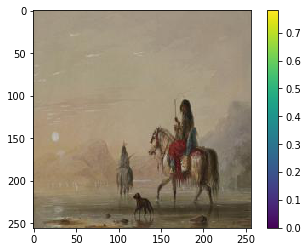

(256, 256, 3)
0.0


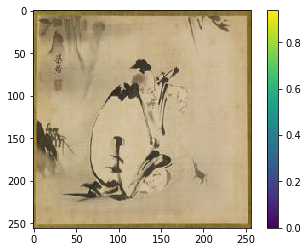

(256, 256, 3)
1.0


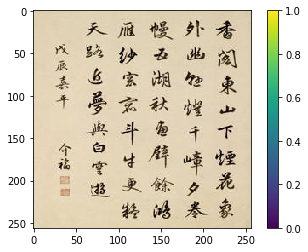

(256, 256, 3)
1.0


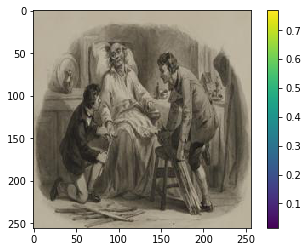

(256, 256, 3)
0.0


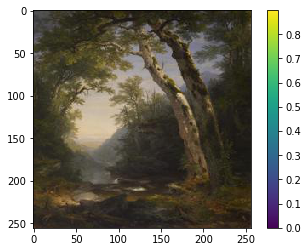

(256, 256, 3)
0.0


In [7]:
import matplotlib.pyplot as plt
import numpy as np
itor = 0
for my_batch in train_generator:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        # Gives one image and its corresponding label
        #plt.imshow(images[i])
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(images[i].shape)
        print(labels[i])
        break
    if itor > 3: break
    itor+=1

Build a model:

In [9]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import matplotlib.pyplot as plt

In [11]:

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu', input_shape = (256, 256, 3)))
model.add(Conv2D(filters = 8, kernel_size = 3, activation = 'relu'))
model.add(Conv2D(filters = 8, kernel_size = 3, activation = 'relu'))
model.add(Conv2D(filters = 8, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 8, strides = 8))
model.add(Flatten())
model.add(Dense(units = 16, activation = 'relu'))
model.add( Dense( 1, activation = 'sigmoid' ) )
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(model.summary())
train_model(model,epochs=100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 8)       4616      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 250, 250, 8)       584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 248, 248, 8)       584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 7688)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                1